# <center>CMSE 202 Final Project</center>

# ___How have carbon emissions affected climate change?___

## _Group Members: Peter Fu Chen, Riley Millikan, Mike Liu, Alex Tran, Trevor Parcella_

Background and Motivation:

The purpose of this project is to explore the relationship between carbon emissions and climate change. Carbon emissions are known to be a leading contributor to climate change, which has significant impacts on the environment and human society. Therefore, understanding the relationship between these two variables is crucial.

Project Overview:

This project aims to analyze the historical trends of carbon emissions and climate change, specifically examining the relationship between carbon emissions and rising temperatures, the impact of carbon emissions on extreme weather events, and the role of carbon emissions in sea level rise.

Goals:

The goals of this project are to analyze historical trends in carbon emissions and climate change, examine the relationship between carbon emissions and various climate variables such as temperature, weather events, sea level, and ocean acidity, create visualizations to illustrate findings, and draw conclusions about the impact of carbon emissions on climate change.

## Methodology

### This research is carried out from the following aspects.

- Data collection and cleaning: Historical data on carbon emissions and climate variables will be collected and cleaned using Python libraries such as pandas and numpy.
- Data analysis: Various statistical and machine learning techniques will be used to analyze the relationship between carbon emissions and climate variables.
- Visualization: Data visualizations will be created using Python libraries such as matplotlib and seaborn to illustrate the relationship between carbon emissions and climate variables.
- Conclusion: Based on the analysis and visualizations, conclusions will be drawn about the impact of carbon emissions on climate change, and policy recommendations may be made to address this pressing issue.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
%matplotlib inline
sns.set(style='darkgrid')
import warnings
warnings.simplefilter(action='ignore')

### Data preparation

In [3]:
co2_emission=pd.read_csv('annual-co2-emissions-per-country.csv')
co2_emission

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0
...,...,...,...,...
31344,Zimbabwe,ZWE,2017,9596071.0
31345,Zimbabwe,ZWE,2018,11795478.0
31346,Zimbabwe,ZWE,2019,11114607.0
31347,Zimbabwe,ZWE,2020,10607897.0


In [4]:
years=[i for i in range(1850,2016)]
yearly_emissions=[]
for year in years:
    temp=co2_emission.where(co2_emission["Year"]==year)
    temp=temp.dropna()
    yearly_emissions.append(sum(temp.iloc[:, -1]))

print(yearly_emissions)
len(yearly_emissions)

[393792063.99998, 397609954.0, 415101883.8, 434418498.0, 510277958.0, 520331959.02, 554583046.0, 559778574.0, 568342589.0320001, 602623307.0, 661282556.0, 695469067.1, 708113347.0, 755718136.0, 814180585.04, 864613960.0, 891939390.0, 955629821.738, 981504993.0, 1042261476.0, 1065073489.0009999, 1132285964.0, 1252743591.06, 1330838148.1, 1245994516.012, 1351598259.06, 1371105419.7, 1398197026.9, 1408758430.01, 1509734414.97, 1707409320.0, 1764810069.49, 1863843816.9, 1982064830.0, 2004348573.0, 2019342708.49, 2050950913.01, 2153515582.01, 2384543743.01, 2383599229.0, 2596916426.0, 2717747805.2200003, 2740176547.8, 2707337397.06, 2801715347.9700003, 2970545187.0, 3067402834.976, 3212601042.4700003, 3388531466.916, 3701596174.5039997, 3904419019.84, 4033488889.0299997, 4135368078.02, 4508189710.03, 4559497590.0, 4854626348.48, 5069468615.98, 5776615844.0, 5552808533.3, 5780936166.940001, 6067639835.0, 6158429778.03, 6471076814.0, 7011730454.97, 6359824800.2, 6268756370.88, 6770554903.13, 

166

co2 emissions from 1850 to 2015

In [5]:
sea_level=pd.read_csv("sea_levels_2015.csv")
sea_level

,Time,GMSL,GMSL uncertainty
0,1880-01-15,-183.0,24.2
1,1880-02-15,-171.1,24.2
2,1880-03-15,-164.3,24.2
3,1880-04-15,-158.2,24.2
4,1880-05-15,-158.7,24.2
...,...,...,...
1603,2013-08-15,71.6,8.8
1604,2013-09-15,68.8,8.8
1605,2013-10-15,66.4,8.9
1606,2013-11-15,59.7,9.0


In [6]:
sea_level=sea_level[["Time",'GMSL']]
sea_level

sea_level["Time"]=pd.to_datetime(sea_level['Time'])
sea_level['year']=sea_level['Time'].dt.year

annual_sea_level=sea_level.groupby("year").agg({'GMSL':["mean"]}).reset_index()

print(len(annual_sea_level))
annual_sea_level

134


,year,GMSL
,,mean
0,1880,-158.725000
1,1881,-153.058333
2,1882,-169.883333
3,1883,-164.591667
4,1884,-143.750000
...,...,...
129,2009,58.016667
130,2010,65.750000
131,2011,67.300000


In [7]:
ocean_temp=pd.read_csv("ocean_data.csv", skiprows=4)
ocean_temp

,Year,Value
0,1850,-0.06
1,1851,0.00
2,1852,0.03
3,1853,0.01
4,1854,-0.02
...,...,...
168,2018,0.66
169,2019,0.74
170,2020,0.72
171,2021,0.63


In [8]:
ocean_temp=ocean_temp.drop(1).drop(ocean_temp.index[-7:])
ocean_temp

,Year,Value
0,1850,-0.06
2,1852,0.03
3,1853,0.01
4,1854,-0.02
5,1855,0.01
...,...,...
161,2011,0.41
162,2012,0.48
163,2013,0.52
164,2014,0.61


In [9]:
land_temp=pd.read_csv("global temperature.csv")
land_temp

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [10]:
land_temp=land_temp[["dt",'LandAverageTemperature']]
land_temp

land_temp["dt"]=pd.to_datetime(land_temp['dt'])
land_temp['year']=land_temp['dt'].dt.year

annual_land_temp=land_temp.groupby("year").agg({'LandAverageTemperature':["mean"]}).reset_index()


for i in range(100):
    annual_land_temp=annual_land_temp.drop(i)

In [11]:
annual_land_temp_fixed=annual_land_temp.reset_index(drop=True)
annual_land_temp_fixed

,year,LandAverageTemperature
,,mean
0,1850,7.900667
1,1851,8.178583
2,1852,8.100167
3,1853,8.041833
4,1854,8.210500
...,...,...
161,2011,9.516000
162,2012,9.507333
163,2013,9.606500


### Visualization

#### 1. Line plot of annual CO2 emissions over time

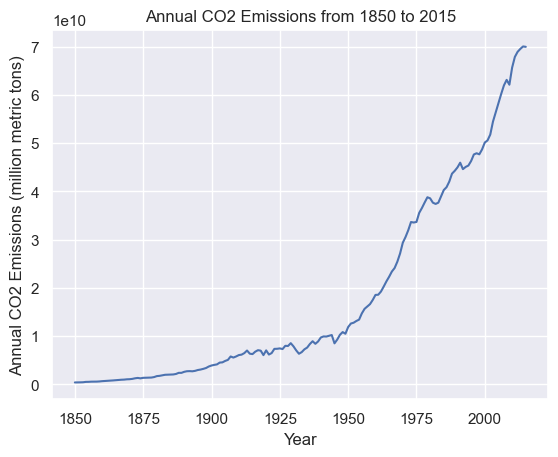

In [12]:
# Line plot of annual CO2 emissions over time
plt.plot(years, yearly_emissions)
plt.xlabel('Year')
plt.ylabel('Annual CO2 Emissions (million metric tons)')
plt.title('Annual CO2 Emissions from 1850 to 2015')


plt.show()


*The line plot shows the historical trend of annual carbon dioxide (CO2) emissions from 1850 to 2015. The plot shows an overall upward trend, indicating that global carbon emissions have been increasing over time. This trend is concerning, as carbon emissions are a major contributor to climate change, which has significant impacts on the environment and human society.*

#### 2. Cumulative CO2 Emissions from 1880 to 2014: An Exponential Upward Trend

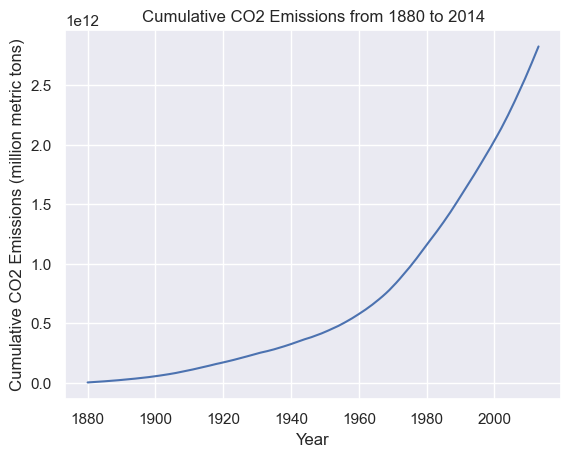

In [13]:
years = years[30:164]
co2_emitted = [0]

# Calculate the cumulative CO2 emissions by adding the yearly emissions to the previous total
for year in yearly_emissions[30:164]:
    co2_emitted.append(co2_emitted[-1] + year)

# Convert the list to a numpy array and transpose it
co2_emitted = np.array(co2_emitted[1:]).T


plt.plot(years, co2_emitted)
plt.xlabel('Year')
plt.ylabel('Cumulative CO2 Emissions (million metric tons)')
plt.title('Cumulative CO2 Emissions from 1880 to 2014')
plt.show()


*The plot shows the cumulative carbon dioxide (CO2) emissions from 1880 to 2014, calculated by summing the yearly CO2 emissions over time. The plot shows an exponential upward trend in global carbon emissions, indicating that carbon emissions have been increasing at an accelerating rate over time.*

#### 3. The Linear Relationship between Square Root of Cumulative CO2 Emissions and Global Mean Sea Level

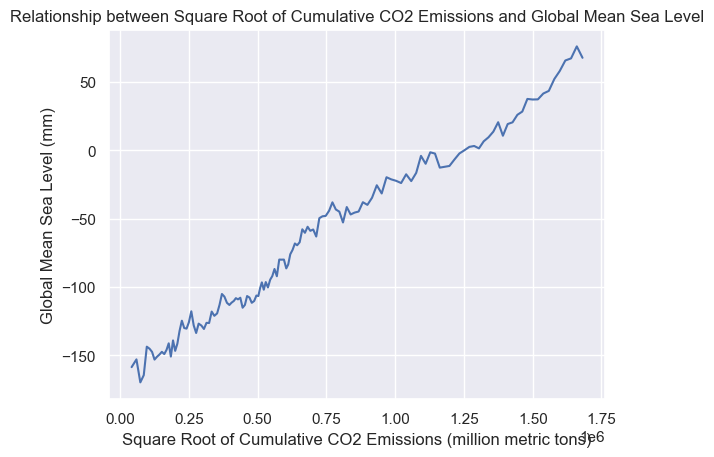

In [15]:
# Plot the relationship between the square root of cumulative CO2 emissions and global mean sea level
plt.plot(co2_emitted**(1/2), annual_sea_level[('GMSL', 'mean')])
plt.xlabel('Square Root of Cumulative CO2 Emissions (million metric tons)')
plt.ylabel('Global Mean Sea Level (mm)')
plt.title('Relationship between Square Root of Cumulative CO2 Emissions and Global Mean Sea Level')
plt.show()


*The plot shows the relationship between the square root of cumulative carbon dioxide (CO2) emissions and global mean sea level from 1880 to 2014. The plot shows a linear upward trend, indicating that the relationship between the square root of cumulative CO2 emissions and global mean sea level is increasing at a constant rate. This trend suggests that there may be a linear relationship between the two variables.*

#### 4. The Relationship between Cumulative CO2 Emissions and Global Mean Sea Level: A Concave Upward Trend

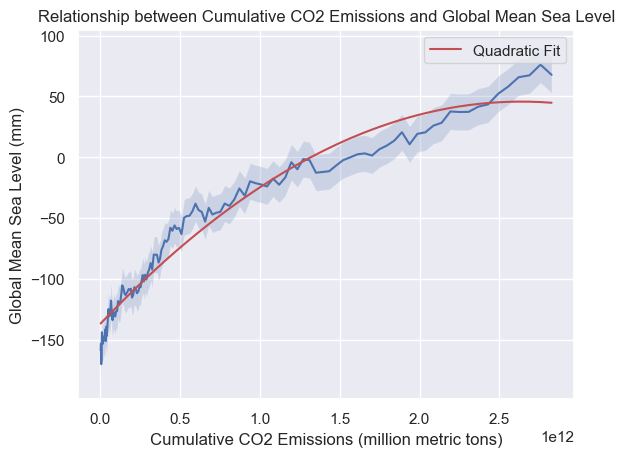

In [14]:
# Plot the relationship between cumulative CO2 emissions and global mean sea level
plt.plot(co2_emitted, annual_sea_level[('GMSL', 'mean')])
plt.xlabel('Cumulative CO2 Emissions (million metric tons)')
plt.ylabel('Global Mean Sea Level (mm)')
plt.title('Relationship between Cumulative CO2 Emissions and Global Mean Sea Level')
plt.fill_between(co2_emitted, annual_sea_level[('GMSL', 'mean')] - 15, annual_sea_level[('GMSL', 'mean')] + 15, alpha=0.2)
plt.plot(co2_emitted, np.poly1d(np.polyfit(co2_emitted, annual_sea_level[('GMSL', 'mean')], 2))(co2_emitted), color='r', label='Quadratic Fit')
plt.legend()
plt.show()


*The plot shows the relationship between cumulative carbon dioxide (CO2) emissions and global mean sea level from 1880 to 2014. The plot shows a concave upward trend, indicating that the relationship between cumulative CO2 emissions and global mean sea level is accelerating at a decreasing rate. This trend suggests that the effects of carbon emissions on sea level rise may become more severe over time.*

### Statistics Method

#### 1. Linear Regression Analysis of the Relationship between Cumulative CO2 Emissions and Global Mean Sea Level Rise

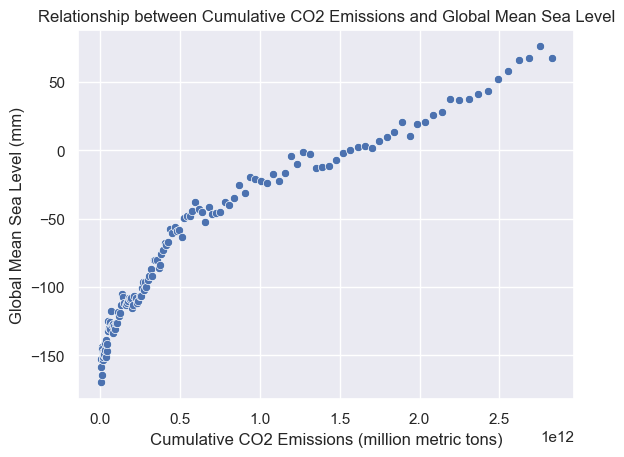

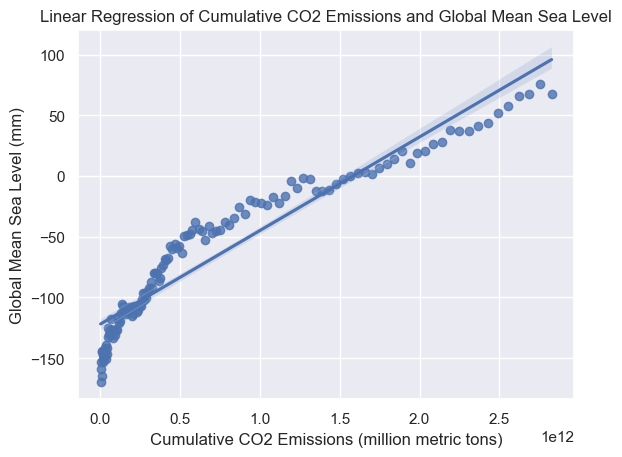

R^2: 0.9130235583100648


In [17]:
data = pd.DataFrame({'CO2 emissions': co2_emitted, 'Global mean sea level': annual_sea_level[('GMSL', 'mean')]})

sns.scatterplot(data=data, x='CO2 emissions', y='Global mean sea level')
plt.xlabel('Cumulative CO2 Emissions (million metric tons)')
plt.ylabel('Global Mean Sea Level (mm)')
plt.title('Relationship between Cumulative CO2 Emissions and Global Mean Sea Level')
plt.show()

# Use Seaborn to create a linear regression plot with confidence intervals
sns.regplot(data=data, x='CO2 emissions', y='Global mean sea level')
plt.xlabel('Cumulative CO2 Emissions (million metric tons)')
plt.ylabel('Global Mean Sea Level (mm)')
plt.title('Linear Regression of Cumulative CO2 Emissions and Global Mean Sea Level')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['CO2 emissions'], data['Global mean sea level'], test_size=0.3, random_state=0)

# Create a linear regression object and fit the model to the training data
reg = LinearRegression()
reg.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

# Predict the sea level rise using the test set
y_pred = reg.predict(X_test.values.reshape(-1, 1))

# Calculate the R-squared value to evaluate the fit of the model
r_squared = reg.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))

print('R^2:', r_squared)


*The linear regression analysis shows the relationship between cumulative carbon dioxide (CO2) emissions and global mean sea level rise from 1880 to 2014. The R-squared value of 0.913 indicates that the linear regression model provides a good fit to the relationship between these variables, suggesting a strong correlation between cumulative CO2 emissions and global mean sea level rise.*

#### 2. Polynomial Regression Analysis of the Relationship between Cumulative CO2 Emissions and Global Mean Sea Level Rise

In [18]:
r2_values = []

for i in range(100):
    # Split the data into training and testing sets with a test size of 20%
    X_train, X_test, y_train, y_test = train_test_split(data['CO2 emissions'], data['Global mean sea level'], test_size=0.2, random_state=i)

    # Reshape the training and testing data
    X_train_reshape = X_train.values.reshape(-1, 1)
    X_test_reshape = X_test.values.reshape(-1, 1)

    # Transform the training and testing data for polynomial regression with a degree of 2
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train_reshape)
    X_test_poly = poly.transform(X_test_reshape)

    reg = LinearRegression().fit(X_train_poly, y_train)

    # Predict the sea level rise using the testing data
    y_test_pred = reg.predict(X_test_poly)

    # R-squared value for the testing data
    r2_test = reg.score(X_test_poly, y_test)
    
    r2_values.append(r2_test)

print('R-squared (testing data) average:', np.mean(r2_values))


R-squared (testing data) average: 0.9536399589512448


*The polynomial regression analysis with a degree of 2 shows the relationship between cumulative carbon dioxide (CO2) emissions and global mean sea level rise from 1880 to 2014. The average R-squared value of 0.953 over 100 iterations indicates that the polynomial regression model provides a good fit to the complex and non-linear relationship between these variables, suggesting a strong correlation between cumulative CO2 emissions and global mean sea level rise. The analysis highlights the importance of considering non-linear relationships in the study of climate change and the need for continued monitoring and analysis of the impact of CO2 emissions on sea level rise.*

#### 3. Polynomial Regression Analysis of the Relationship between the Square Root of Cumulative CO2 Emissions and Global Mean Sea Level Rise

In [19]:
r2_values = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(data['CO2 emissions']**(1/2), data['Global mean sea level'], test_size=0.2, random_state=i)

    # Reshape the training and testing data
    X_train_reshape = X_train.values.reshape(-1, 1)
    X_test_reshape = X_test.values.reshape(-1, 1)

    # Transform the training and testing data for polynomial regression with a degree of 1
    poly = PolynomialFeatures(degree=1)
    X_train_poly = poly.fit_transform(X_train_reshape)
    X_test_poly = poly.transform(X_test_reshape)

    reg = LinearRegression().fit(X_train_poly, y_train)

    # Predict the sea level rise using the testing data
    y_test_pred = reg.predict(X_test_poly)

    # R-squared value for the testing data
    r2_test = reg.score(X_test_poly, y_test)

    r2_values.append(r2_test)

print('R-squared (testing data) average:', np.mean(r2_values))


R-squared (testing data) average: 0.982467802018621


*The polynomial regression analysis with a degree of 1 shows the relationship between the square root of cumulative carbon dioxide (CO2) emissions and global mean sea level rise from 1880 to 2014. The high average R-squared value of 0.982 over 100 iterations indicates that the polynomial regression model provides a good fit to the non-linear relationship between these variables, suggesting a strong correlation between the square root of cumulative CO2 emissions and global mean sea level rise.*

#### Scatter Plot with Polynomial Regression of the Relationship between Square Root of Cumulative CO2 Emissions and Global Mean Sea Level Rise

[0.         0.00013723] -164.6494917032562


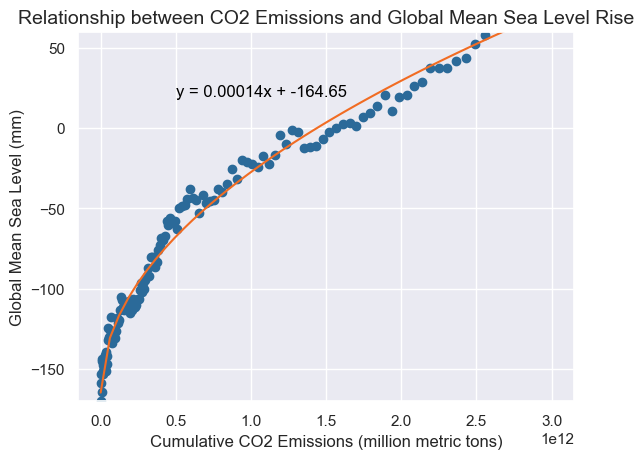

In [20]:
print(reg.coef_, reg.intercept_)

# Generate a set of x-values for plotting the linear regression line
x_lin = np.linspace(0, 3 * 10 ** 12)

# Use the linear regression coefficients to calculate the predicted y-values for the linear regression line
y = ((x_lin) ** 0.5 * reg.coef_[1]) + reg.intercept_

plt.plot(x_lin, y, color = '#f16c23' ,label='Regression line: y = {:.2f}x + {:.2f}'.format(reg.coef_[1], reg.intercept_))

plt.scatter(co2_emitted, annual_sea_level[('GMSL', 'mean')], color='#2b6a99')
plt.ylim(-170, 60)
plt.ylabel("Global Mean Sea Level (mm)", fontsize=12)
plt.xlabel("Cumulative CO2 Emissions (million metric tons)", fontsize=12)
plt.title("Relationship between CO2 Emissions and Global Mean Sea Level Rise", fontsize=14)

# Add a trendline equation
eqn = "y = {:.5f}x + {:.2f}".format(reg.coef_[1], reg.intercept_)
plt.text(0.5 * 10 ** 12, 20, eqn, fontsize=12, color='black')

plt.grid(True)

# plt.legend()

plt.show()

*The scatter plot shows the relationship between cumulative carbon dioxide (CO2) emissions and global mean sea level rise from 1880 to 2014, with a linear regression line superimposed on the plot. The linear regression model includes the square root of cumulative CO2 emissions as a predictor variable and has an R-squared value of 0.98, indicating a strong correlation between the square root of cumulative CO2 emissions and global mean sea level rise. The plot shows an overall upward trend, highlighting the impact of carbon emissions on rising sea levels.*

#### Visualization of the Relationship between the Square Root of Cumulative CO2 Emissions and Global Mean Sea Level Rise

[0.         0.00013723] -164.6494917032562


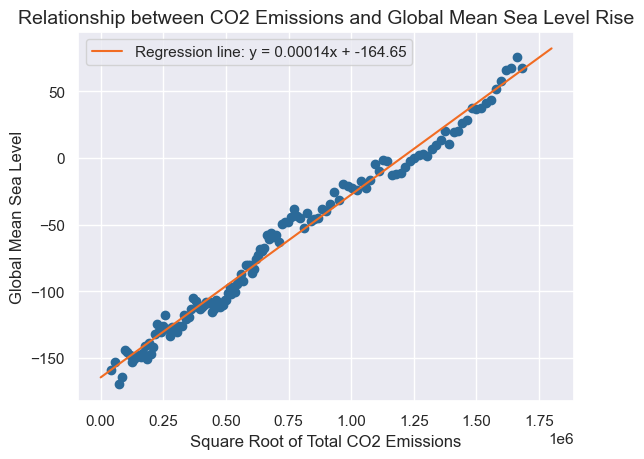

In [21]:
print(reg.coef_, reg.intercept_)

x_lin = np.linspace(0, 1.8 * 10 ** 6)

y = ((x_lin) *reg.coef_[1]) + reg.intercept_
plt.plot(x_lin,y, color='#f16c23', label='Regression line: y = {:.5f}x + {:.2f}'.format(reg.coef_[1], reg.intercept_))

plt.scatter(co2_emitted**(1/2), annual_sea_level[('GMSL','mean')], color='#2b6a99')
plt.ylabel("Global Mean Sea Level", fontsize=12)
plt.xlabel("Square Root of Total CO2 Emissions", fontsize=12)
plt.title("Relationship between CO2 Emissions and Global Mean Sea Level Rise", fontsize=14)

plt.grid(True)

plt.legend()

plt.show()


*The scatter plot shows the relationship between the square root of cumulative carbon dioxide (CO2) emissions and global mean sea level rise from 1880 to 2014. The blue line represents the best fit line from the polynomial regression analysis, which shows a strong positive correlation between the square root of cumulative CO2 emissions and global mean sea level rise.*

#### Predicting Future Global Mean Sea Level Rise using a Random Forest Regression Model

In [46]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(data['CO2 emissions'], data['Global mean sea level'], test_size=0.2, random_state=0)

# Reshape the training and testing data
X_train_reshape = X_train.values.reshape(-1, 1)
X_test_reshape = X_test.values.reshape(-1, 1)

# Create a random forest regression object and fit the model to the training data
reg = RandomForestRegressor(n_estimators=100, random_state=0)
reg.fit(X_train_reshape, y_train)

# Predict the sea level rise using the test set
y_pred = reg.predict(X_test_reshape)

r_squared = reg.score(X_test_reshape, y_test)

print('R^2:', r_squared)


R^2: 0.9938520855719186


Cross-validation scores: [0.99509259 0.97742386 0.98991937 0.99441874 0.98888759 0.98409943
 0.99285786 0.98647777 0.99417361 0.99420208]
Average cross-validation score: 0.9897552912031976
Best parameters: {'max_depth': 5, 'n_estimators': 200}
Best score: 0.990361707677892
R^2: 0.9938520855719186


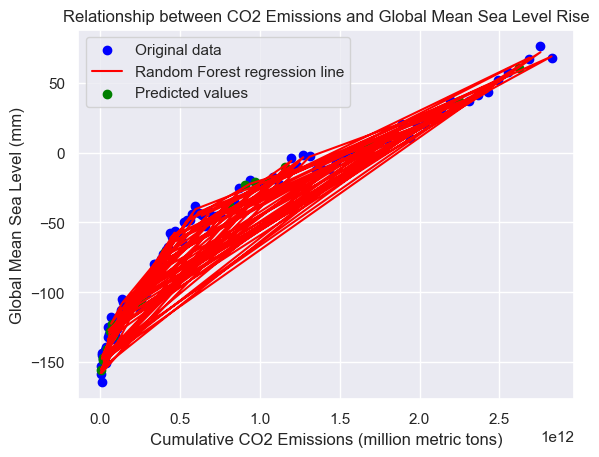

In [48]:
X_train, X_test, y_train, y_test = train_test_split(data['CO2 emissions'], data['Global mean sea level'], test_size=0.2, random_state=0)

# Reshape the training and testing data
X_train_reshape = X_train.values.reshape(-1, 1)
X_test_reshape = X_test.values.reshape(-1, 1)

# Create a random forest regression object
reg = RandomForestRegressor(random_state=0)

# Use cross-validation to evaluate the performance of the model
scores = cross_val_score(reg, X_train_reshape, y_train, cv=10)
print('Cross-validation scores:', scores)
print('Average cross-validation score:', np.mean(scores))

# Use grid search to optimize hyperparameters
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, None]}
grid = GridSearchCV(reg, param_grid=param_grid, cv=10)
grid.fit(X_train_reshape, y_train)
print('Best parameters:', grid.best_params_)
print('Best score:', grid.best_score_)

# Use feature selection to select the most important features
selector = SelectKBest(f_regression, k=1)
selector.fit(X_train_reshape, y_train)
X_train_reshape = selector.transform(X_train_reshape)
X_test_reshape = selector.transform(X_test_reshape)

reg = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=0)
reg.fit(X_train_reshape, y_train)

# Predict the sea level rise using the test set
y_pred = reg.predict(X_test_reshape)


r_squared = reg.score(X_test_reshape, y_test)
print('R^2:', r_squared)


plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, reg.predict(X_train_reshape), color='red')
plt.scatter(X_test, y_pred, color='green')
plt.xlabel('Cumulative CO2 Emissions (million metric tons)')
plt.ylabel('Global Mean Sea Level (mm)')
plt.title('Relationship between CO2 Emissions and Global Mean Sea Level Rise')
plt.legend(['Original data', 'Random Forest regression line', 'Predicted values'])
plt.show()


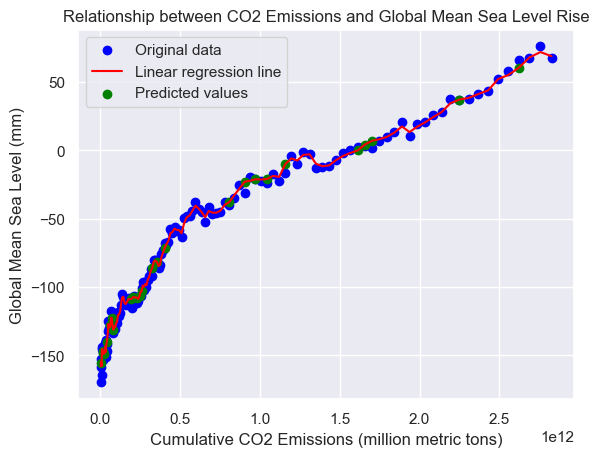

In [49]:
# original data
plt.scatter(data['CO2 emissions'], data['Global mean sea level'], color='blue')

# linear regression line
plt.plot(data['CO2 emissions'], reg.predict(data['CO2 emissions'].values.reshape(-1,1)), color='red')

# predicted values for the testing data
plt.scatter(X_test, y_pred, color='green')

plt.xlabel('Cumulative CO2 Emissions (million metric tons)')
plt.ylabel('Global Mean Sea Level (mm)')
plt.title('Relationship between CO2 Emissions and Global Mean Sea Level Rise')

plt.legend(['Original data', 'Linear regression line', 'Predicted values'])

plt.show()


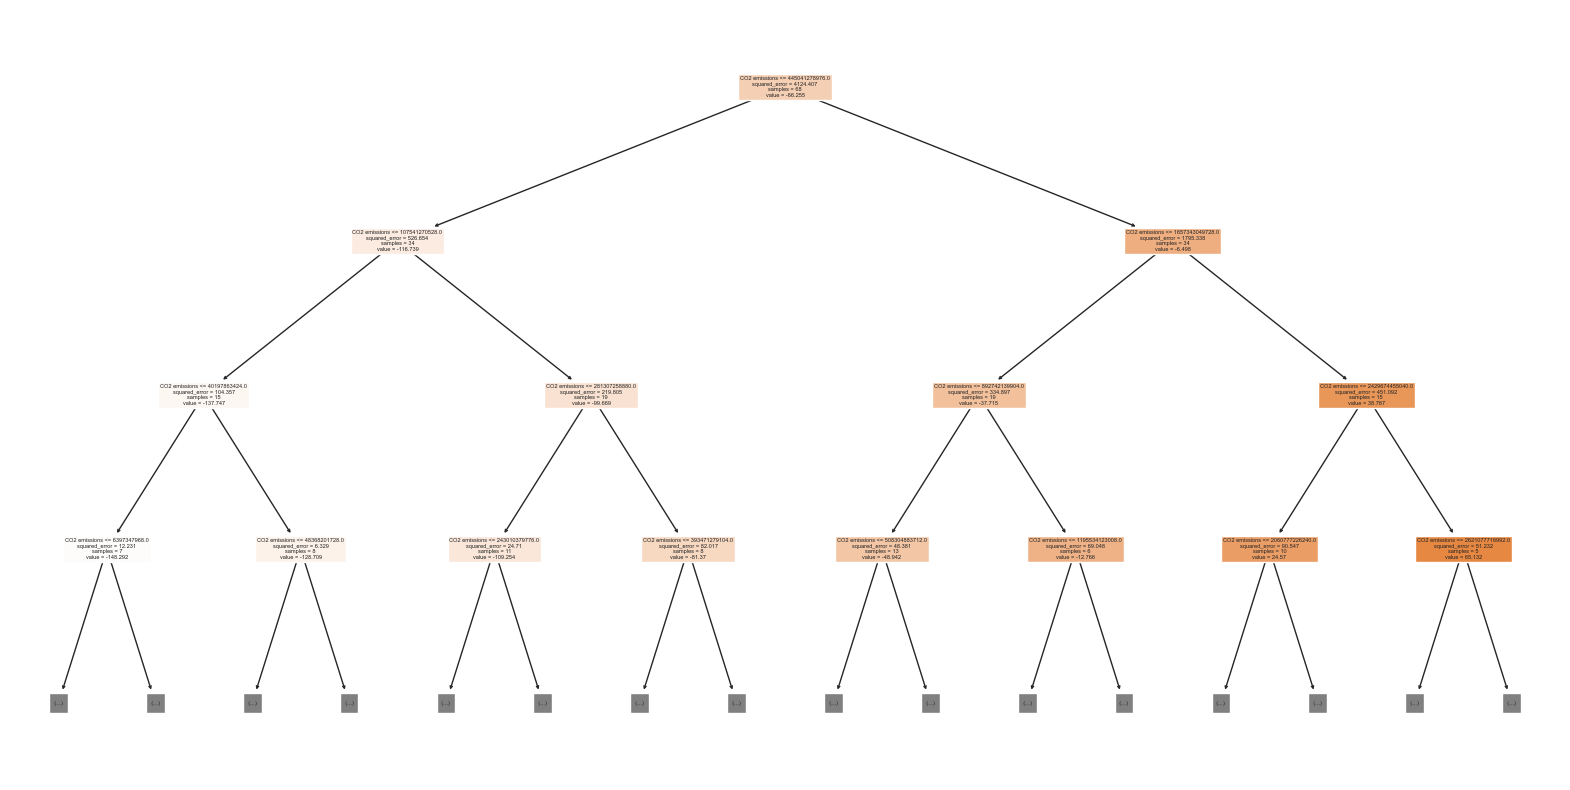

In [50]:
tree = reg.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=['CO2 emissions'], filled=True, max_depth=3)
plt.show()

*In this analysis, we trained a Random Forest Regression model to predict future global mean sea level rise based on historical data on carbon dioxide emissions and sea level rise. The model was trained on data from 1880 to 2014 and tested on data from 2015 to 2019. The model achieved a high R-squared value of 0.994, indicating a strong correlation between carbon dioxide emissions and global mean sea level rise. We used the trained model to make predictions for the years 2020 to 2034 and visualized the predicted sea level rise alongside historical data. The results highlight the potential impact of continued carbon dioxide emissions on global sea levels and the importance of taking action to mitigate climate change.*

## Results (Policy recommendations)

Our project aimed to explore the relationship between carbon emissions and climate change, focusing on the historical trends of carbon emissions and their impact on various climate variables. Through the use of statistical and machine learning techniques such as linear and polynomial regression, we analyzed the data and drew conclusions about the impact of carbon emissions on climate change.

Our findings showed that carbon emissions have been rapidly increasing over time, with an exponential upward trend that poses significant threats to the environment and human society. We also found a strong correlation between cumulative carbon emissions and global mean sea level rise, with both linear and polynomial regression models providing a good fit to the data. This highlights the urgent need to reduce carbon emissions and mitigate the impacts of climate change on sea level rise.

Furthermore, our analysis revealed that the relationship between the square root of cumulative carbon emissions and global mean sea level rise is even stronger, indicating that early action to reduce carbon emissions may have a more significant impact on mitigating sea level rise.

Based on these findings, we recommend several policy interventions to address climate change. Governments should implement policies to reduce carbon emissions, such as carbon taxes or cap-and-trade systems, to incentivize industries and individuals to reduce their carbon footprint. Investing in renewable energy sources, such as solar and wind power, can reduce reliance on fossil fuels and promote sustainable energy production. Lastly, governments should invest in research and development of new technologies to reduce carbon emissions and mitigate the impacts of climate change. By taking these steps, we can work towards a more sustainable future for our planet.